## waypoint 생성

### 맵 이미지 생성

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 확대 비율을 사용자로부터 입력 받기
zoom_factor = float(input("확대 비율을 입력하세요"))

# PGM 이미지 로드
original_img_path = "/home/zoo/addinedu/project/pyri/src/test/test.pgm"
pgm_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)

# 이미지 확대
scaled_img = cv2.resize(pgm_img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

# 확대된 이미지 창에 띄우기
cv2.imshow('Select ROI and Press ENTER', scaled_img)

# ROI 선택 (드래그해서 영역 선택)
roi = cv2.selectROI('Select ROI and Press ENTER', scaled_img, fromCenter=False, showCrosshair=True)

# 'ENTER' 키를 눌렀을 때 ROI 선택이 확정
if roi != (0, 0, 0, 0): 
    x, y, w, h = map(int, roi)
    cropped_img = pgm_img[int(y/zoom_factor):int((y+h)/zoom_factor), int(x/zoom_factor):int((x+w)/zoom_factor)]

    # PNG로 저장
    convert_img_path = "/home/zoo/addinedu/project/pyri/src/test/test.png" 
    cv2.imwrite(convert_img_path, cropped_img)

    print("이미지가 성공적으로 저장되었습니다.")
else:
    print("ROI가 선택되지 않았습니다. 프로그램을 종료합니다.")

# 창 닫기
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
이미지가 성공적으로 저장되었습니다.


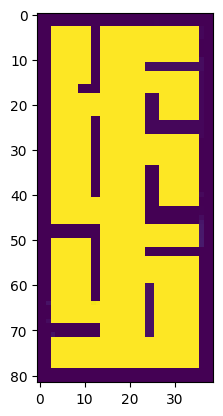

In [8]:
map_img = cv2.imread(convert_img_path,cv2.COLOR_BGR2GRAY )
plt.imshow(map_img)

### 맵 이미지 변환 및 경로 생성

Input Image Dimensions: Height=82, Width=39


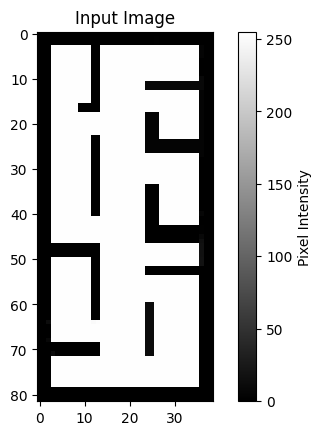

Grid Map Dimensions: Height=82, Width=39
Each Cell: Height=1, Width=1


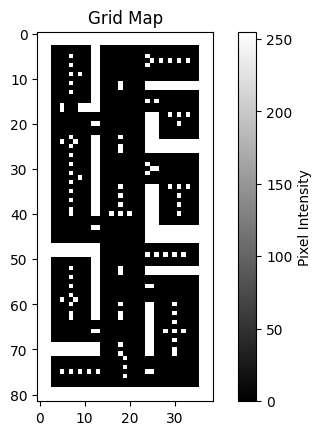

맵 결과 (0: 도로, 1: 벽, 2: 이동경로):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0,

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

convert_img_path = "/home/zoo/addinedu/project/pyri/src/test/test.png" 
map_img = cv2.imread(convert_img_path,cv2.COLOR_BGR2GRAY)
plt.imshow(map_img)

def image_grid(img, grid_rows, grid_cols, threshold=210, 
               contact_distance_vertical=1, contact_distance_horizontal=1,
               continuous_distance_vertical=1, continuous_distance_horizontal=1):
    
    if len(img.shape) != 2:
        raise ValueError("입력 이미지는 흑백 이미지(numpy 2D 배열)여야 합니다.")
    if not (0 <= img.min() and img.max() <= 255):
        raise ValueError("입력 이미지의 값 범위는 0~255여야 합니다.")
    
    img_height, img_width = img.shape  # 이미지 크기
    cell_height = img_height // grid_rows  # 각 셀의 높이
    cell_width = img_width // grid_cols    # 각 셀의 너비
    
    map_cost = []  # 결과를 저장할 리스트
    
    # 그리드 단위로 순회
    for row in range(grid_rows):
        row_values = []
        for col in range(grid_cols):
            # 각 셀의 범위 계산
            cell_top = row * cell_height
            cell_left = col * cell_width
            cell_bottom = cell_top + cell_height
            cell_right = cell_left + cell_width
            
            # 마지막 행 또는 열의 셀이 이미지 크기를 넘어갈 경우 보정
            if row == grid_rows - 1:
                cell_bottom = img_height
            if col == grid_cols - 1:
                cell_right = img_width

            # 그리드 셀 추출
            cell = img[cell_top:cell_bottom, cell_left:cell_right]
            
            # 흰색 픽셀(도로)과 검은색 픽셀(벽) 계산
            road = np.sum(cell > threshold)  # 흰색 픽셀 수
            wall = np.sum(cell <= threshold)  # 검은색 픽셀 수
            
            # 흰색이 더 많으면 0(도로), 검은색이 더 많으면 1(벽)
            row_values.append(0 if road > wall else 1)
        
        map_cost.append(row_values)  # 현재 행 결과 추가

    # 가로에서 벽 사이 중앙에 길(값 2) 추가
    for i in range(len(map_cost)):  # 각 행을 순회
        start = -1  # 도로 시작 인덱스
        for j in range(len(map_cost[i])):
            if map_cost[i][j] == 1:  # 벽을 만나면
                if start != -1:  # 이전 도로 구간이 있으면
                    center_col = (start + j - 1) // 2  # 도로의 중앙 계산
                    if map_cost[i][center_col] != 1:  # 중앙이 벽이 아니면
                        map_cost[i][center_col] = 2  # 길 추가
                start = -1  # 도로 구간 초기화
            elif start == -1:  # 도로 시작
                start = j
        # 마지막 도로 구간 처리
        if start != -1:
            center_col = (start + len(map_cost[i]) - 1) // 2
            if map_cost[i][center_col] != 1:
                map_cost[i][center_col] = 2

    # 세로에서 벽 사이 중앙에 길(값 2) 추가
    for j in range(len(map_cost[0])):  # 각 열을 순회
        start = -1  # 도로 시작 인덱스
        for i in range(len(map_cost)):
            if map_cost[i][j] == 1:  # 벽을 만나면
                if start != -1:  # 이전 도로 구간이 있으면
                    center_row = (start + i - 1) // 2  # 도로의 중앙 계산
                    if map_cost[center_row][j] != 1:  # 중앙이 벽이 아니면
                        map_cost[center_row][j] = 2  # 길 추가
                start = -1  # 도로 구간 초기화
            elif start == -1:  # 도로 시작
                start = i
        # 마지막 도로 구간 처리
        if start != -1:
            center_row = (start + len(map_cost) - 1) // 2
            if map_cost[center_row][j] != 1:
                map_cost[center_row][j] = 2

    # 연속된 2 구간 중 상하/좌우 범위에 맞춰 중간만 남기기
    for i in range(len(map_cost)):
        for j in range(1, len(map_cost[i]) - 1):
            if map_cost[i][j] == 2:
                # 연속된 2 구간이 상하/좌우 범위 내에서 연속된 경우
                if all(map_cost[i + di][j] == 2 for di in range(-continuous_distance_vertical, continuous_distance_vertical + 1) if 0 <= i + di < len(map_cost)) or \
                   all(map_cost[i][j + dj] == 2 for dj in range(-continuous_distance_horizontal, continuous_distance_horizontal + 1) if 0 <= j + dj < len(map_cost[i])):
                    map_cost[i][j] = 0  # 연속된 2는 0으로 변경

    # 1과 접해 있는 2를 제거
    for i in range(len(map_cost)):
        for j in range(len(map_cost[i])):
            if map_cost[i][j] == 2:
                # 상하좌우에서 지정된 거리만큼 1과 접한 경우 2를 0으로 변경
                for di in range(-contact_distance_vertical, contact_distance_vertical + 1):
                    for dj in range(-contact_distance_horizontal, contact_distance_horizontal + 1):
                        if 0 <= i + di < len(map_cost) and 0 <= j + dj < len(map_cost[i]):
                            if map_cost[i + di][j + dj] == 1:
                                map_cost[i][j] = 0
                                break
                    if map_cost[i][j] == 0:  # 이미 0으로 바꾼 경우 더 이상 체크하지 않음
                        break

    return map_cost, cell_height, cell_width

# 입력 이미지 시각화 및 크기 출력
img_height, img_width = map_img.shape
grid_rows = img_height  # 세로 칸 수
grid_cols = img_width  # 가로 칸 수
threshold = 240  # 픽셀 임계값

# 함수 호출
contact_distance_vertical = 2  # 예시: 상하 거리
contact_distance_horizontal = 2  # 예시: 좌우 거리
continuous_distance_vertical = 1  # 상하 연속된 2 제거 범위
continuous_distance_horizontal = 1  # 좌우 연속된 2 제거 범위
my_map, cell_height, cell_width = image_grid(map_img, grid_rows, grid_cols, threshold, 
                                             contact_distance_vertical, contact_distance_horizontal, 
                                             continuous_distance_vertical, continuous_distance_horizontal)


print(f"Input Image Dimensions: Height={img_height}, Width={img_width}")
plt.imshow(map_img, cmap="gray", vmin=0, vmax=255)
plt.title("Input Image")
plt.colorbar(label="Pixel Intensity")
plt.show()


# 결과 맵 시각화 및 크기 출력
map_height = len(my_map)
map_width = len(my_map[0])
print(f"Grid Map Dimensions: Height={map_height}, Width={map_width}")
print(f"Each Cell: Height={cell_height}, Width={cell_width}")

# 결과 맵 시각화
scaled_map = np.array(my_map) * 255  # 0, 1 값을 0, 255로 스케일링
plt.imshow(scaled_map, cmap="gray", vmin=0, vmax=255)
plt.title("Grid Map")
plt.colorbar(label="Pixel Intensity")
plt.show()

# 결과 출력: 맵 확인
print("맵 결과 (0: 도로, 1: 벽, 2: 이동경로):")
for row in my_map:
    print(row)


### 맵 경로 수정

저장된 맵:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

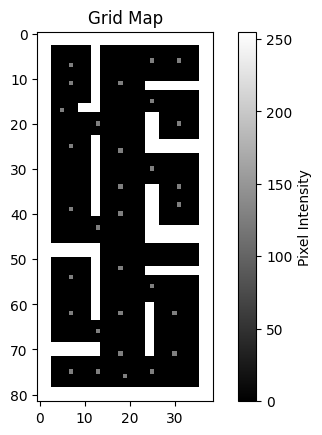

True

In [10]:
import cv2
import numpy as np

# OpenCV 창에 표시할 맵 생성 (스케일 조정)
def draw_map(map_data, cell_height, cell_width, scale=1):
    map_image = np.zeros((len(map_data) * cell_height * scale, len(map_data[0]) * cell_width * scale), dtype=np.uint8)
    for i, row in enumerate(map_data):
        for j, cell in enumerate(row):
            top_left = (j * cell_width * scale, i * cell_height * scale)
            bottom_right = ((j + 1) * cell_width * scale, (i + 1) * cell_height * scale)
            if cell == 1:  # 벽은 흰색
                color = 255
            elif cell == 2:  # 이동 경로는 회색
                color = 127
            else:  # 도로는 검은색
                color = 0
            map_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = color
    return map_image

# 마우스 이벤트 핸들러 정의
def mouse_callback(event, x, y, flags, param):
    global map_data, cell_height, cell_width, scale
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 클릭으로 이동경로 제거
        col = x // (cell_width * scale)
        row = y // (cell_height * scale)
        if 0 <= row < len(map_data) and 0 <= col < len(map_data[0]):
            # 2(이동경로)인 경우 0(도로)로 변경
            if map_data[row][col] == 2:
                map_data[row][col] = 0
            elif map_data[row][col] == 0:
                map_data[row][col] = 2


# 초기화
map_data = my_map.copy()
scale = 4  # 이미지 배율 설정
map_image = draw_map(map_data, cell_height, cell_width, scale)

cv2.namedWindow("Grid Map Editor")
cv2.setMouseCallback("Grid Map Editor", mouse_callback)

while True:
    # 맵 업데이트
    map_image = draw_map(map_data, cell_height, cell_width, scale)
    cv2.imshow("Grid Map Editor", map_image)

    # 키 입력 처리
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q') or key == 27:  # 'q' 또는 ESC 키를 누르면 종료
        break
    elif key == ord('s') or key == 13:  # 's' 또는 Enter 키를 누르면 저장
        print("저장된 맵:")
        for row in map_data:
            print(row)

            
cv2.destroyAllWindows()

# 결과 맵 시각화 및 저장
scaled_map = np.array(map_data, dtype=np.uint8)  # 0, 1, 2 값을 유지
scaled_map = np.where(scaled_map == 1, 255, scaled_map)  # 벽(1) -> 255
scaled_map = np.where(scaled_map == 2, 127, scaled_map)  # 이동경로(2) -> 127

plt.imshow(scaled_map, cmap="gray", vmin=0, vmax=255)
plt.title("Grid Map")
plt.colorbar(label="Pixel Intensity")
plt.show()

convert_img_load_path = "/home/zoo/addinedu/project/pyri/src/test/test_load.png"
cv2.imwrite(convert_img_load_path, scaled_map)

## waypoint 좌표 변환

### waypoint 좌표 생성

이동 경로 좌표 리스트: [(5, 19), (6, 7), (6, 13), (6, 25), (10, 18), (10, 30), (15, 13), (19, 7), (19, 18), (19, 30), (25, 25), (27, 7), (29, 18), (38, 13), (41, 18), (42, 7), (43, 31), (47, 18), (47, 31), (51, 25), (55, 18), (56, 7), (61, 13), (61, 31), (64, 5), (66, 25), (70, 7), (70, 18), (74, 7), (75, 25), (75, 31)]
좌표 개수: 31


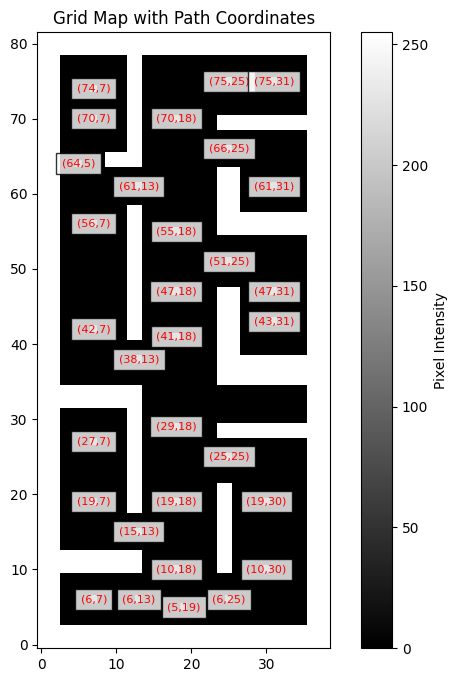

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 저장된 이미지 로드
convert_img_load_path = "/home/zoo/addinedu/project/pyri/src/test/test_load.png"
loaded_image = cv2.imread(convert_img_load_path, cv2.IMREAD_GRAYSCALE)

# 이미지 좌우 반전 (y축 원점을 유지하면서 맵 모양 유지)
loaded_image = np.flipud(loaded_image)

# 임계값을 사용하여 맵 데이터를 0, 1, 2로 변환 (예: 0=도로, 127=경로, 255=벽)
map_data = np.zeros_like(loaded_image)
map_data[loaded_image == 255] = 1  # 벽 (흰색)
map_data[loaded_image == 127] = 2  # 이동 경로 (회색)

# 이동 경로(2)의 좌표를 저장할 리스트
path_coordinates = []

# 맵 데이터에서 값이 2인 좌표 찾기
for row_idx, row in enumerate(map_data):
    for col_idx, cell in enumerate(row):
        if cell == 2:
            path_coordinates.append((row_idx, col_idx))

# 결과 출력
print("이동 경로 좌표 리스트:", path_coordinates)
print("좌표 개수:", len(path_coordinates))

# 결과 맵 시각화
plt.figure(figsize=(8, 8))
plt.imshow(loaded_image, cmap="gray", vmin=0, vmax=255, origin='lower')  # y축 원점 변경

# 좌표 텍스트 추가
for (row, col) in path_coordinates:
    plt.text(col, row, f"({row},{col})", color="red", fontsize=8, ha="center", va="center", 
             bbox=dict(facecolor='white', alpha=0.8))

# 그래프 설정
plt.title("Grid Map with Path Coordinates")
plt.colorbar(label="Pixel Intensity")
plt.show()


### 실제 맵 좌표로 변환

변환된 이동 경로 좌표 리스트: [(0.75, -0.05), (0.0, 0.0), (0.38, 0.0), (1.12, 0.0), (0.69, 0.2), (1.44, 0.2), (0.31, 0.44), (0.0, 0.64), (0.69, 0.64), (1.44, 0.64), (1.12, 0.94), (0.0, 1.03), (0.69, 1.13), (0.31, 1.58), (0.69, 1.72), (0.0, 1.77), (1.5, 1.82), (0.69, 2.02), (1.5, 2.02), (1.12, 2.22), (0.69, 2.41), (0.0, 2.46), (0.31, 2.71), (1.5, 2.71), (-0.12, 2.86), (1.12, 2.96), (0.0, 3.15), (0.69, 3.15), (0.0, 3.35), (1.12, 3.4), (1.5, 3.4)]
좌표 개수: 31


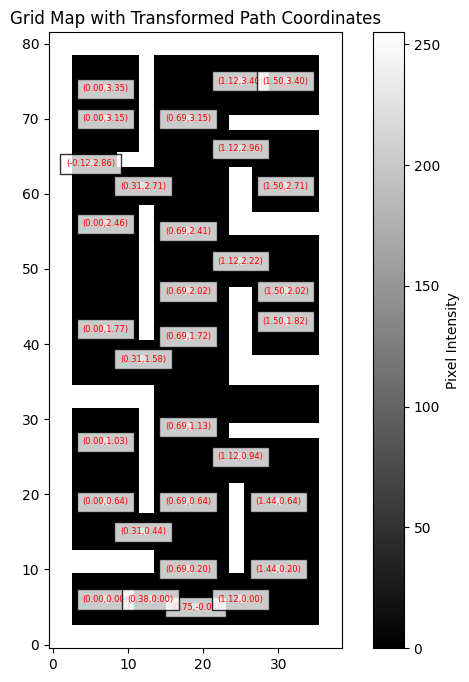

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 저장된 이미지 로드
convert_img_load_path = "/home/zoo/addinedu/project/pyri/src/test/test_load.png"
loaded_image = cv2.imread(convert_img_load_path, cv2.IMREAD_GRAYSCALE)

# 이미지 좌우 반전 (y축 원점을 유지하면서 맵 모양 유지)
loaded_image = np.flipud(loaded_image)

# 임계값을 사용하여 맵 데이터를 0, 1, 2로 변환 (예: 0=도로, 127=경로, 255=벽)
map_data = np.zeros_like(loaded_image)
map_data[loaded_image == 255] = 1  # 벽 (흰색)
map_data[loaded_image == 127] = 2  # 이동 경로 (회색)

# 이동 경로(2)의 좌표를 저장할 리스트
path_coordinates = []

# 맵 데이터에서 값이 2인 좌표 찾기
for row_idx, row in enumerate(map_data):
    for col_idx, cell in enumerate(row):
        if cell == 2:
            path_coordinates.append((row_idx, col_idx))

# 변환할 기준 좌표
origin_min = (6, 7)  
origin_max = (75, 31)
target_min = (0, 0)
target_max = (1.5, 3.4)

# 선형 변환 계수 계산
scale_x = (target_max[0] - target_min[0]) / (origin_max[1] - origin_min[1])  # x 방향 스케일
scale_y = (target_max[1] - target_min[1]) / (origin_max[0] - origin_min[0])  # y 방향 스케일

# 좌표 변환 함수
def transform_coordinates(pixel):
    row, col = pixel
    new_x = (col - origin_min[1]) * scale_x  # x축 방향 변환
    new_y = (row - origin_min[0]) * scale_y  # y축 방향 변환
    return (round(new_x, 2), round(new_y, 2))

# 변환된 좌표 리스트 생성
transformed_path_coordinates = [transform_coordinates(coord) for coord in path_coordinates]

# 결과 출력
print("변환된 이동 경로 좌표 리스트:", transformed_path_coordinates)
print("좌표 개수:", len(transformed_path_coordinates))

# 결과 맵 시각화
plt.figure(figsize=(8, 8))
plt.imshow(loaded_image, cmap="gray", vmin=0, vmax=255, origin='lower')  # y축 원점 변경

# 변환 전 좌표에 변환된 좌표 텍스트 추가
for (orig, (new_x, new_y)) in zip(path_coordinates, transformed_path_coordinates):
    plt.text(orig[1], orig[0], f"({new_x:.2f},{new_y:.2f})", color="red", fontsize=6, ha="center", va="center", 
             bbox=dict(facecolor='white', alpha=0.8))

# 그래프 설정
plt.title("Grid Map with Transformed Path Coordinates")
plt.colorbar(label="Pixel Intensity")
plt.show()

### 최적 이동 경로 좌표 생성

변환된 최적 이동 경로 좌표: [(0.0, 0.0), (0.38, 0.0), (0.69, 0.64), (0.69, 1.13), (0.69, 1.72), (1.12, 2.22), (1.5, 1.82)]
좌표 개수: 7


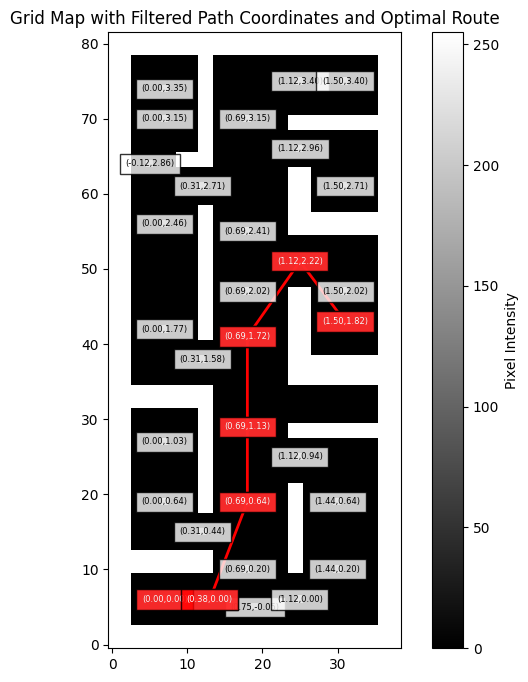

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
import heapq

def inverse_transform_coordinates(coord):
    new_x, new_y = coord
    row = round((new_y - target_min[1]) / scale_y + origin_min[0])
    col = round((new_x - target_min[0]) / scale_x + origin_min[1])
    return (row, col)

def is_wall(coord):
    """ 특정 좌표가 벽인지 확인 """
    row, col = coord
    return not (0 <= row < map_data.shape[0] and 0 <= col < map_data.shape[1]) or map_data[row, col] == 1

def is_path_clear(coord1, coord2, threshold):
    """ 두 좌표 사이에 벽이 있는지 확인하고 threshold 내에서 허용 """
    if distance.cityblock(coord1, coord2) > threshold:
        return False
    r1, c1 = coord1
    r2, c2 = coord2
    num_steps = max(abs(r2 - r1), abs(c2 - c1))
    for step in range(1, num_steps + 1):
        r = int(r1 + step * (r2 - r1) / num_steps)
        c = int(c1 + step * (c2 - c1) / num_steps)
        if is_wall((r, c)):
            return False
    return True

def find_shortest_path(start, goal, path_coordinates, threshold=15):
    """ A* 알고리즘을 사용하여 최적의 경로 탐색 """
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {coord: float("inf") for coord in path_coordinates}
    g_score[start] = 0
    f_score = {coord: float("inf") for coord in path_coordinates}
    f_score[start] = distance.cityblock(start, goal)

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            return path[::-1]
        
        for neighbor in path_coordinates:
            if neighbor == current or not is_path_clear(current, neighbor, threshold):
                continue
            
            tentative_g_score = g_score[current] + distance.cityblock(current, neighbor)
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + distance.cityblock(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    
    return []

# 변환된 시작 및 목표 지점
start = inverse_transform_coordinates((0.0, 0.0))
goal = inverse_transform_coordinates((1.5, 1.82))

# 최적 경로 찾기
threshold_value = 18
optimal_path = find_shortest_path(start, goal, path_coordinates, threshold=threshold_value)

# 최적 경로 좌표 변환
transformed_path_coordinates = [transform_coordinates(coord) for coord in optimal_path]
print("변환된 최적 이동 경로 좌표:", transformed_path_coordinates)
print("좌표 개수:", len(transformed_path_coordinates))

plt.figure(figsize=(8, 8))
plt.imshow(loaded_image, cmap="gray", vmin=0, vmax=255, origin='lower')

for (row, col) in path_coordinates:
    transformed_coord = transform_coordinates((row, col))
    plt.text(col, row, f"({transformed_coord[0]:.2f},{transformed_coord[1]:.2f})", color="black", fontsize=6, ha="center", va="center", 
             bbox=dict(facecolor='white', alpha=0.8))

for (row, col) in optimal_path:
    transformed_coord = transform_coordinates((row, col))
    plt.text(col, row, f"({transformed_coord[0]:.2f},{transformed_coord[1]:.2f})", color="white", fontsize=6, ha="center", va="center", 
             bbox=dict(facecolor='red', alpha=0.8))

# 최적 경로를 선으로 연결
if optimal_path:
    path_x, path_y = zip(*optimal_path)  # x, y 좌표 분리
    plt.plot(path_y, path_x, color="red", linestyle="-", linewidth=2, marker="o", markersize=5, label="Optimal Path")             

# 그래프 설정
plt.title("Grid Map with Filtered Path Coordinates and Optimal Route")
plt.colorbar(label="Pixel Intensity")
plt.show()

## waypoint 좌표 전달

### waypoint actionserver 연결

In [ ]:
import rclpy
from rclpy.node import Node
from nav2_msgs.action import FollowWaypoints
from rclpy.action import ActionClient

rclpy.init()
action_node = rclpy.create_node("follow_waypoints_client")
action_client = ActionClient(action_node, FollowWaypoints, "/follow_waypoints")

def feedback_callback(feedback_msg):
    current_waypoint = feedback_msg.feedback.current_waypoint
    print("current_waypoint: {0}".format(current_waypoint))

def get_result_callback(future):
    result = future.result()
    print("Result: {0}".format(result))
    rclpy.shutdown()    

def goal_response_callback(future):
    goal_handle = future.result()
    if not goal_handle.accepted:
        print("Goal rejected")
        return
    
    print("Goal accepted")

    get_result_future = goal_handle.get_result_async()
    get_result_future.add_done_callback(get_result_callback)

if not action_client.wait_for_server(timeout_sec=10.0):
    print("Action server not available!")
else:
    print("Action server available!")

### 주행 명령

In [ ]:
from geometry_msgs.msg import PoseStamped

goal_pose_list = []

def publish_waypoint(x, y, direction):
    goal_pose = PoseStamped()
    goal_pose.header.frame_id = "map"
    goal_pose.pose.position.x = x
    goal_pose.pose.position.y = y

    orientations = {
        "F": (0.0, 1.0),
        "B": (-1.0, 0.0),
        "L": (0.7, 0.7),
        "R": (-0.7, 0.7),
    }

    goal_pose.pose.orientation.z, goal_pose.pose.orientation.w = orientations.get(direction, (0.0, 1.0))

    # goal_pose_list.append(goal_pose)
    return goal_pose

In [ ]:
# 원점
o = publish_waypoint(0.0, 0.0, "F")

# 통로
p1 = publish_waypoint(0.75, -0.05, "L")
p2 = publish_waypoint(0.69, 0.20, "L")
p3 = publish_waypoint(0.69, 0.64, "L")
p4 = publish_waypoint(0.69, 1.13, "L")
p5 = publish_waypoint(0.69, 1.72, "L")
p6 = publish_waypoint(0.69, 2.02, "L")
p7 = publish_waypoint(0.69, 2.41, "L")
p8 = publish_waypoint(0.69, 3.15, "L")

#방1
d1 = publish_waypoint(0.38, 0.44, "B")
r1_1 = publish_waypoint(0.0, 0.64, "L")
r1_2 = publish_waypoint(0.0, 1.03, "L")

#방2
d2_1 = publish_waypoint(0.38, 1.58, "B")
d2_2 = publish_waypoint(0.38, 2.71, "B")
r2_1 = publish_waypoint(0.0, 1.77, "L")
r2_2 = publish_waypoint(0.0, 2.46, "L")

#방3
d3 = publish_waypoint(-0.12, 2.86, "B")
r3_1 = publish_waypoint(0.0, 3.15, "L")
r3_2 = publish_waypoint(0.0, 3.35, "L")

In [ ]:
#방1 이동
goal_pose_list_r1 = [o, p1, p2, d1, r1_1, r1_2]

#방2 이동
goal_pose_list_r2 = [o, p1, p2, p3, p4, d2_1, r2_1, r2_2]

#방3 이동
goal_pose_list_r3 = [o, p1, p2, p3, p4, p5, p6, p7, d2_2, d3, r3_1, r3_2]

In [ ]:
goal_msg = FollowWaypoints.Goal()
# goal_pose_list.reverse() 
# goal_msg.poses = goal_pose_list
goal_msg.poses = goal_pose_list_r1

send_goal_future = action_client.send_goal_async(goal_msg, feedback_callback=feedback_callback)
send_goal_future.add_done_callback(goal_response_callback)

In [ ]:
rclpy.spin(action_node)

In [ ]:
action_node.destroy_node()
rclpy.shutdown()